In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import pickle as pkl

from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier,BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier ,ExtraTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB , MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report


warnings.filterwarnings("ignore")


C:\Users\Chetan Kumar M\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
data = pd.read_csv("farmer_helper.csv")

In [9]:
data.describe()

,Unnamed: 0,temperature,humidity,ph,rainfall,N,P,K
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,749.500000,25.430545,75.113914,6.390652,121.728344,52.666667,48.333333,53.333333
std,433.157015,5.393916,19.624902,0.642545,51.150488,35.502054,35.633346,58.633160
min,0.000000,8.825675,18.092240,4.507524,40.351531,20.000000,10.000000,10.000000
25%,374.750000,22.616237,64.589876,5.884768,87.736901,20.000000,20.000000,20.000000
50%,749.500000,25.046573,81.319567,6.351950,107.711167,40.000000,40.000000,30.000000
75%,1124.250000,27.988736,90.876194,6.835967,149.770282,80.000000,60.000000,50.000000
max,1499.000000,43.675493,99.981876,7.995849,298.560117,120.000000,125.000000,200.000000


In [3]:
x = data[["temperature","humidity","ph","rainfall","N","P","K"]]

AttributeError: 'DataFrame' object has no attribute 'describec'

In [4]:
y = data[["Crop"]]

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=200)

In [6]:
model = []
model.append(["Logisic" , LogisticRegression()])
model.append(["Decession Tree" , DecisionTreeClassifier()])
model.append(["Bagging" , BaggingClassifier()])
model.append(["ADA boost" , AdaBoostClassifier()])
model.append(["XGBOOST" , XGBClassifier()])
model.append(["SVC" , SVC()])
model.append(["Gaussion" , GaussianNB()])
model.append(["Multinam nominal nb" , MultinomialNB()])
model.append(["Random Forest" , RandomForestClassifier()])
model.append(["Extra Tree" , ExtraTreeClassifier()])
model.append(["Grading" , GradientBoostingClassifier()])


[14:56:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:xlabel='Acc', ylabel='name'>

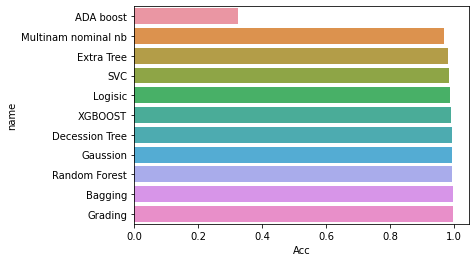

In [7]:
model_name = []
model_acc = []
for l,m in model:
    m.fit(x_train,y_train)
    model_acc.append(accuracy_score(m.predict(x_test),y_test))
    model_name.append(l)
data = pd.DataFrame(data = {"name": model_name,"Acc": model_acc})
data = data.sort_values(by = "Acc")
sns.barplot(y = "name", x= "Acc" , orient="h" , data = data)

In [20]:
final_model = GradientBoostingClassifier()
final_model.fit(x_train,y_train)

GradientBoostingClassifier()

In [22]:
pkl.dump(final_model,open("model.pkl","wb"))

### Deployment

In [27]:
d = pkl.load(open("model.pkl","rb"))

In [28]:
d.predict(x_test)

array(['cotton', 'rice', 'pomegranate', 'jute', 'black gram', 'apple',
       'apple', 'kidney beans', 'pomegranate', 'papaya', 'grapes',
       'coconut', 'banana', 'jute', 'black gram', 'grapes', 'orange',
       'papaya', 'coffee', 'pomegranate', 'grapes', 'rice',
       'kidney beans', 'coconut', 'coconut', 'mango', 'orange', 'coffee',
       'coffee', 'black gram', 'coffee', 'kidney beans', 'apple',
       'black gram', 'banana', 'apple', 'orange', 'cotton', 'cotton',
       'coconut', 'coconut', 'black gram', 'kidney beans', 'black gram',
       'jute', 'mango', 'coconut', 'cotton', 'grapes', 'apple',
       'kidney beans', 'orange', 'rice', 'coconut', 'cotton',
       'kidney beans', 'papaya', 'pomegranate', 'jute', 'pomegranate',
       'jute', 'black gram', 'maize', 'cotton', 'coconut', 'mango',
       'coffee', 'pomegranate', 'grapes', 'banana', 'apple', 'coffee',
       'kidney beans', 'jute', 'coconut', 'banana', 'banana', 'banana',
       'apple', 'banana', 'orange', 'rice

In [8]:
data

,name,Acc
3,ADA boost,0.323333
7,Multinam nominal nb,0.970000
9,Extra Tree,0.980000
5,SVC,0.983333
0,Logisic,0.986667
4,XGBOOST,0.990000
1,Decession Tree,0.993333
6,Gaussion,0.993333
8,Random Forest,0.993333
2,Bagging,0.996667


[14:56:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:xlabel='Acc', ylabel='name'>

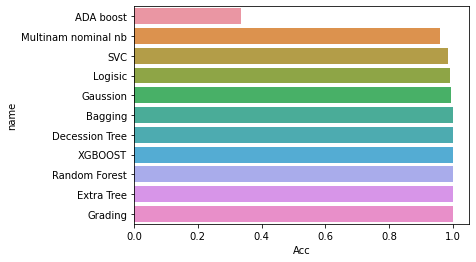

In [9]:
model_name = []
model_acc = []
for l,m in model:
    m.fit(x_train,y_train)
    model_acc.append(accuracy_score(m.predict(x_train),y_train))
    model_name.append(l)
data = pd.DataFrame(data = {"name": model_name,"Acc": model_acc})
data = data.sort_values(by = "Acc")
sns.barplot(y = "name", x= "Acc" , orient="h" , data = data)

In [10]:
data

,name,Acc
3,ADA boost,0.335833
7,Multinam nominal nb,0.958333
5,SVC,0.985833
0,Logisic,0.990833
6,Gaussion,0.993333
2,Bagging,0.999167
1,Decession Tree,1.000000
4,XGBOOST,1.000000
8,Random Forest,1.000000
9,Extra Tree,1.000000


In [11]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(x_train,y_train)
print("accuracy score of train ",accuracy_score(model.predict(x_train),y_train))
print("accuracy score of test ",accuracy_score(model.predict(x_test),y_test))


accuracy score of train  0.995
accuracy score of test  1.0


In [12]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
print("accuracy score of train ",accuracy_score(model.predict(x_train),y_train))
print("accuracy score of test ",accuracy_score(model.predict(x_test),y_test))

accuracy score of train  1.0
accuracy score of test  0.9933333333333333


In [13]:
model = BaggingClassifier()
model.fit(x_train,y_train)
print("accuracy score of train ",accuracy_score(model.predict(x_train),y_train))
print("accuracy score of test ",accuracy_score(model.predict(x_test),y_test))
print("classfication Report " , classification_report(model.predict(x_test),y_test))

accuracy score of train  0.9991666666666666
accuracy score of test  0.99
classfication Report                precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
  black gram       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        19
      cotton       1.00      1.00      1.00        24
      grapes       1.00      1.00      1.00        16
        jute       0.92      0.96      0.94        23
kidney beans       1.00      1.00      1.00        21
       maize       1.00      1.00      1.00        14
       mango       1.00      1.00      1.00        16
      orange       1.00      1.00      1.00        22
      papaya       1.00      1.00      1.00        21
 pomegranate       1.00      1.00      1.00        22
        rice       0.94      0.88      0.91        17

    accuracy                           

In [14]:
def macha(x1,x2,x3,x4,x5,x6,x7):
    x = np.array([[x1,x2,x3,x4,x5,x6,x7]])
    return model.predict(x)
    

In [15]:
macha(00.87,85.80,6.50,112.9355,20,10,40)

array(['pomegranate'], dtype=object)

In [16]:
macha(1110,110,110,110,110,110,110)

array(['banana'], dtype=object)

In [17]:
data.tail()

,name,Acc
1,Decession Tree,1.0
4,XGBOOST,1.0
8,Random Forest,1.0
9,Extra Tree,1.0
10,Grading,1.0


In [18]:
x.describe()

,temperature,humidity,ph,rainfall,N,P,K
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,25.430545,75.113914,6.390652,121.728344,52.666667,48.333333,53.333333
std,5.393916,19.624902,0.642545,51.150488,35.502054,35.633346,58.633160
min,8.825675,18.092240,4.507524,40.351531,20.000000,10.000000,10.000000
25%,22.616237,64.589876,5.884768,87.736901,20.000000,20.000000,20.000000
50%,25.046573,81.319567,6.351950,107.711167,40.000000,40.000000,30.000000
75%,27.988736,90.876194,6.835967,149.770282,80.000000,60.000000,50.000000
max,43.675493,99.981876,7.995849,298.560117,120.000000,125.000000,200.000000
